## <center> Bike Sharing

### Ask:
Predict the total count of bikes rented during each hour in test set.

### Data:
<br>
<li> Hourly rental data spanning two years.
<li> Training set contains first 19 days of each month.
<li> Test Set contains 20th to end of month.

### Features:
<ol>
<li> datetime - hourly date + timestamp  
<li> season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
<li> holiday - whether the day is considered a holiday
<li> workingday - whether the day is neither a weekend nor holiday
<li> weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
<li> weather - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
<li> weather - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<li> weather - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
<li> temp - temperature in Celsius
<li> atemp - "feels like" temperature in Celsius
<li> humidity - relative humidity
<li> windspeed - wind speed
<li> casual - number of non-registered user rentals initiated
<li> registered - number of registered user rentals initiated
<li> count - number of total rentals
    </ol>

In [126]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from datetime import datetime
import calendar

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read dataset
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
#Review training set data
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#Review test set data
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
df_train.shape, df_test.shape

((10886, 12), (6493, 9))

### Backup data

In [7]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

---

In [8]:
#Reviewing datatypes
df_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [151]:
df_temp = pd.to_datetime(df_train['datetime'])
df_temp.dtypes

dtype('<M8[ns]')

In [152]:
#Adding additional columns weekday, month, year, hour
df_train['year_X'] = df_temp.apply(lambda x: x.year)
df_train['month_X'] = df_temp.apply(lambda x: calendar.month_name[x.month])
df_train['weekday_X'] = df_temp.apply(lambda x: calendar.day_name[x.weekday()])
df_train['hour_X'] = df_temp.apply(lambda x: x.hour)
df_train['date_X'] = df_temp.apply(lambda x: x.day)

In [154]:
df_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year_X,month_X,weekday_X,hour_X,date_X
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,Saturday,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,Saturday,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,Saturday,2,1


In [28]:
#Check for any null values in dataset
df_train.isnull().sum().any()

False

#### Working with Season Feature

In [167]:
#Lets map the season label to its column
df_train['season'] = df_train['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [171]:
#Ensuring datatype now changed to object, as it makes more sense to have it as categorical data.
df_train['season'].dtype

dtype('O')

In [202]:
df_train.groupby('season')['count'].max()

season
Fall      977
Spring    801
Summer    873
Winter    948
Name: count, dtype: int64

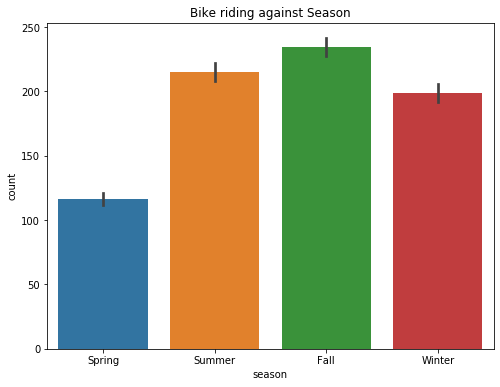

In [181]:
#Reviewing data visually
plt.figure(figsize=(8,6))
sb.barplot(x = 'season', y= 'count', data=df_train)
plt.title('Bike riding against Season')
plt.show();

#### Looks like 'Summer' and 'Fall' are Biking Seasons ...!!

### Working with Weather Feature

In [174]:
#As like season let's map weather as well
df_train['weather'] = df_train['weather'].map({1:'Clear-Cloudy', 2:'Misty-Cloudy', 3:'Light Rain-Storm', 4:'Rain-'})

In [176]:
df_train['weather'].dtype

dtype('O')

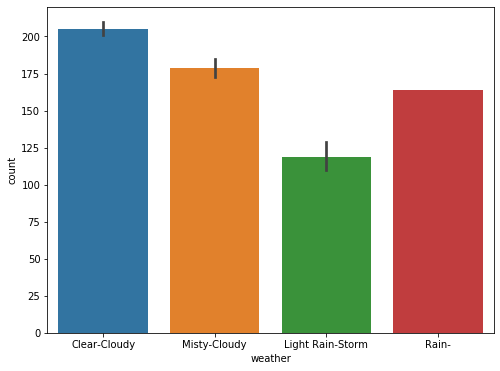

In [183]:
#Let's plot it
plt.figure(figsize=(8,6))
sb.barplot(x='weather', y='count', data=df_train)
plt.show();

In [187]:
df_train.weather.value_counts()

Clear-Cloudy        7192
Misty-Cloudy        2834
Light Rain-Storm     859
Rain-                  1
Name: weather, dtype: int64

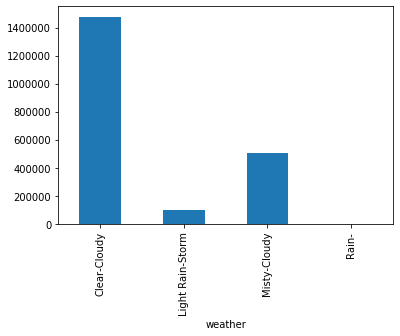

In [199]:
df_train.groupby('weather')['count'].agg('sum').plot(kind='bar');

In [200]:
df_train.groupby('weather')['count'].sum()

weather
Clear-Cloudy        1476063
Light Rain-Storm     102089
Misty-Cloudy         507160
Rain-                   164
Name: count, dtype: int64

In [193]:
df_train[df_train['weather'] == 'Rain-']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year_X,month_X,weekday_X,hour_X,date_X
5631,2012-01-09 18:00:00,Spring,0,1,Rain-,8.2,11.365,86,6.0032,6,158,164,2012,January,Monday,18,9


### Continue with Holiday Feature

In [177]:
df_train.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [29]:
#Remove few cols from dataset to build test model
dcols = ['datetime', 'casual', 'registered', 'count']

#Save del col values to new dataframe
df_target = df_train[dcols]

df_target.head()

,datetime,casual,registered,count
0,2011-01-01 00:00:00,3,13,16
1,2011-01-01 01:00:00,8,32,40
2,2011-01-01 02:00:00,5,27,32
3,2011-01-01 03:00:00,3,10,13
4,2011-01-01 04:00:00,0,1,1


In [30]:
df_train.shape

(10886, 16)

In [31]:
#Delete the cols
df_train.drop(dcols, inplace=True, axis=1)

In [32]:
df_train.shape

(10886, 12)

In [33]:
df_train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year_X,month_X,day_X,hour_X
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2


In [34]:
#Set the target y value
y_train = df_target['count'].values

In [119]:
df_temp = pd.to_datetime(df_target['datetime'])
df_temp.dtype

dtype('<M8[ns]')

In [149]:
#Setting up week day in training data
df_temp.apply(lambda x: calendar.day_name[x.weekday()])

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: datetime, Length: 10886, dtype: object

In [132]:
x = df_temp[0]# -> Sat
x

Timestamp('2011-01-01 00:00:00')

In [146]:
print('Day:',calendar.day_name[x.weekday()])
print('Month:', calendar.month_name[x.month])

Day: Saturday
Month: January


In [145]:
calendar.day_name[x.weekday()]

'Saturday'

In [142]:
calendar.day_name[datetime.today().weekday()]

'Friday'

---

In [38]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=1000, random_state=42, objective='reg:squarederror')

In [39]:
model.fit(df_train.values, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [41]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    return np.sqrt(np.mean((np.log1p(y) - np.log1p(y_pred))**2))

In [44]:
pred = model.predict(df_train.values)
print('RMSLE: ', rmsle(y_train, pred))

RMSLE:  nan


In [55]:
s_temp = pd.Series(data=pred, name='BikeCount')

In [59]:
rmsle(y_train, round(s_temp))

inf

In [40]:
df_test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [60]:
df_temp = pd.to_datetime(df_test['datetime'])
#Add date, month, year, hour to test set
df_test['year_X'] = df_temp.apply(lambda x: x.year)
df_test['month_X'] = df_temp.apply(lambda x: x.month)
df_test['day_X'] = df_temp.apply(lambda x: x.day)
df_test['hour_X'] = df_temp.apply(lambda x: x.hour)

In [62]:
df_test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year_X,month_X,day_X,hour_X
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2


In [63]:
s_test_datetime = df_test['datetime']
df_test.drop('datetime', inplace=True, axis=1)

In [64]:
df_test.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year_X,month_X,day_X,hour_X
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2


In [65]:
df_train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year_X,month_X,day_X,hour_X
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2


In [66]:
test_pred = model.predict(df_test.values)

In [72]:
len(test_pred[test_pred<0])

376

In [74]:
len(y_train[y_train<1])

0

In [75]:
len(test_pred)

6493

In [76]:
s_test_pred = pd.Series(data=test_pred, name='TestBikeCount')

In [93]:
s_test_pred.dtype

dtype('float32')

In [107]:
s_test_pred = s_test_pred.apply(lambda x: 0 if x < 0 else x)

In [111]:
s_test_pred = s_test_pred.apply(lambda x:round(x))

In [112]:
df_submit = pd.DataFrame({'datetime':s_test_datetime, 'count':s_test_pred})
df_submit.head()

,datetime,count
0,2011-01-20 00:00:00,13
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [113]:
df_submit.shape

(6493, 2)

In [114]:
df_submit.to_csv('submission/Naive_Submision.csv', index=False)